In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
result2 = pd.read_csv('Crash_Locations.csv')

In [3]:
result2['YEAR'] = result2['CRASHDATETIME'].str.split().str.get(0).str.split('/').str.get(0).astype('int64')
result2['MONTH'] = result2['CRASHDATETIME'].str.split().str.get(0).str.split('/').str.get(1).astype('int64')
result2['DATE'] = result2['CRASHDATETIME'].str.split().str.get(0).str.split('/').str.get(2).astype('int64')

In [4]:
result2 = result2[(result2['YEAR'] >= 2013) & (result2['YEAR'] <= 2023)]

In [5]:
result2 = result2.sort_values(by=['YEAR','MONTH','DATE'])
result2.reset_index(drop = True, inplace = True)

In [6]:
result2=result2.loc[:, ['YEAR', 'MONTH', 'DATE', 'ROADWAYSURFACE']]

In [7]:
result2.to_csv('sorted_data.csv')

In [20]:
result2.head(50)

,YEAR,MONTH,DATE,ROADWAYSURFACE
0,2013,1,1,Dry
1,2013,1,1,Dry
2,2013,1,1,Dry
3,2013,1,1,Dry
4,2013,1,1,Dry
5,2013,1,1,Dry
6,2013,1,1,Dry
7,2013,1,1,Dry
8,2013,1,1,Dry
9,2013,1,1,Dry


In [19]:
result2.ROADWAYSURFACE.unique()

array(['Dry', 'Unknown', 'Wet', 'Slippery (Muddy Oily etc.)',
       'Snowy - Icy'], dtype=object)

In [21]:
result2.ROADWAYSURFACE.value_counts()

ROADWAYSURFACE
Dry                           48396
Wet                            4194
Unknown                        2258
Slippery (Muddy Oily etc.)       57
Snowy - Icy                       5
Name: count, dtype: int64

### Most of the car accidents were occurred on dry and wet roads.

In [17]:
d, w = 0, 0
a, b = 0, 0
for y in range(len(result2)):
    if result2['ROADWAYSURFACE'][y] == 'Dry':
        # calculate the number of car accidenets per day on dry road
        if a == 0:
            # initial setting of car accident on dry road: 1
            d += 1
            a = 1
            rd, kd, ld = result2['YEAR'][y], result2['MONTH'][y], result2['DATE'][y]
        if result2['MONTH'][y] > kd or result2['YEAR'][y] > rd:
            # when month or year is increased
            d += 1
            ld = result2['DATE'][y]
            kd = result2['MONTH'][y]
            rd = result2['YEAR'][y]
        elif result2['DATE'][y] > ld:
            # only when date is increased
            d += 1
            ld = result2['DATE'][y]
    elif result2['ROADWAYSURFACE'][y] == 'Wet':
        # calculate the number of car accidents per day on wet road
        if b == 0:
            # initial setting of car accident on wet road: 1
            w += 1
            b = 1
            rw, kw, lw = result2['YEAR'][y], result2['MONTH'][y], result2['DATE'][y]
        if result2['MONTH'][y] > kw or result2['YEAR'][y] > rw:
            # when month or year is increased
            w += 1
            lw = result2['DATE'][y]
            kw = result2['MONTH'][y]
            rw = result2['YEAR'][y]
        elif result2['DATE'][y] > lw:
            # only when date is increased
            w += 1
            lw = result2['DATE'][y]

In [18]:
print("d=",d)  # number of days that car accidents occurred on dry road. #number of accidents per day on dry road: 48396/3829=12.64
print("w=",w)  # number of days that car accidents occurred on wet road. #number of accidents per day on wet road: 4194/808=5.19

d= 3829
w= 808


### In conclusion, the number of car accidents per day on dry road is more than two times of the number of car accidents per day on wet road. I think this is because more people drive on dry road in sunny day than on wet road in rainy day.   
### While the whole number of car accidents on dry road is more than ten times of the whole number of car accidents on wet road, the number of car accidents per day on dry road is more than two times of the number of car accidents per day on wet road. This can be explained that more car accidents can be occurred due to slippery road surface than dry road surface.

In [3]:
result2['LIGHTING'].unique()

array(['Dark - Street Light', 'Unknown', 'Daylight', 'Dusk - Dawn',
       'Dark - No Street Light', 'Dark - Street Light Not Functioning'],
      dtype=object)

In [4]:
LIGHTING = np.array(result2['LIGHTING'])

In [5]:
X = np.array(result2['X'])
Y = np.array(result2['Y'])

  6%|▌         | 36057/594363 [22:23<5:46:42, 26.84it/s] 


KeyboardInterrupt: 

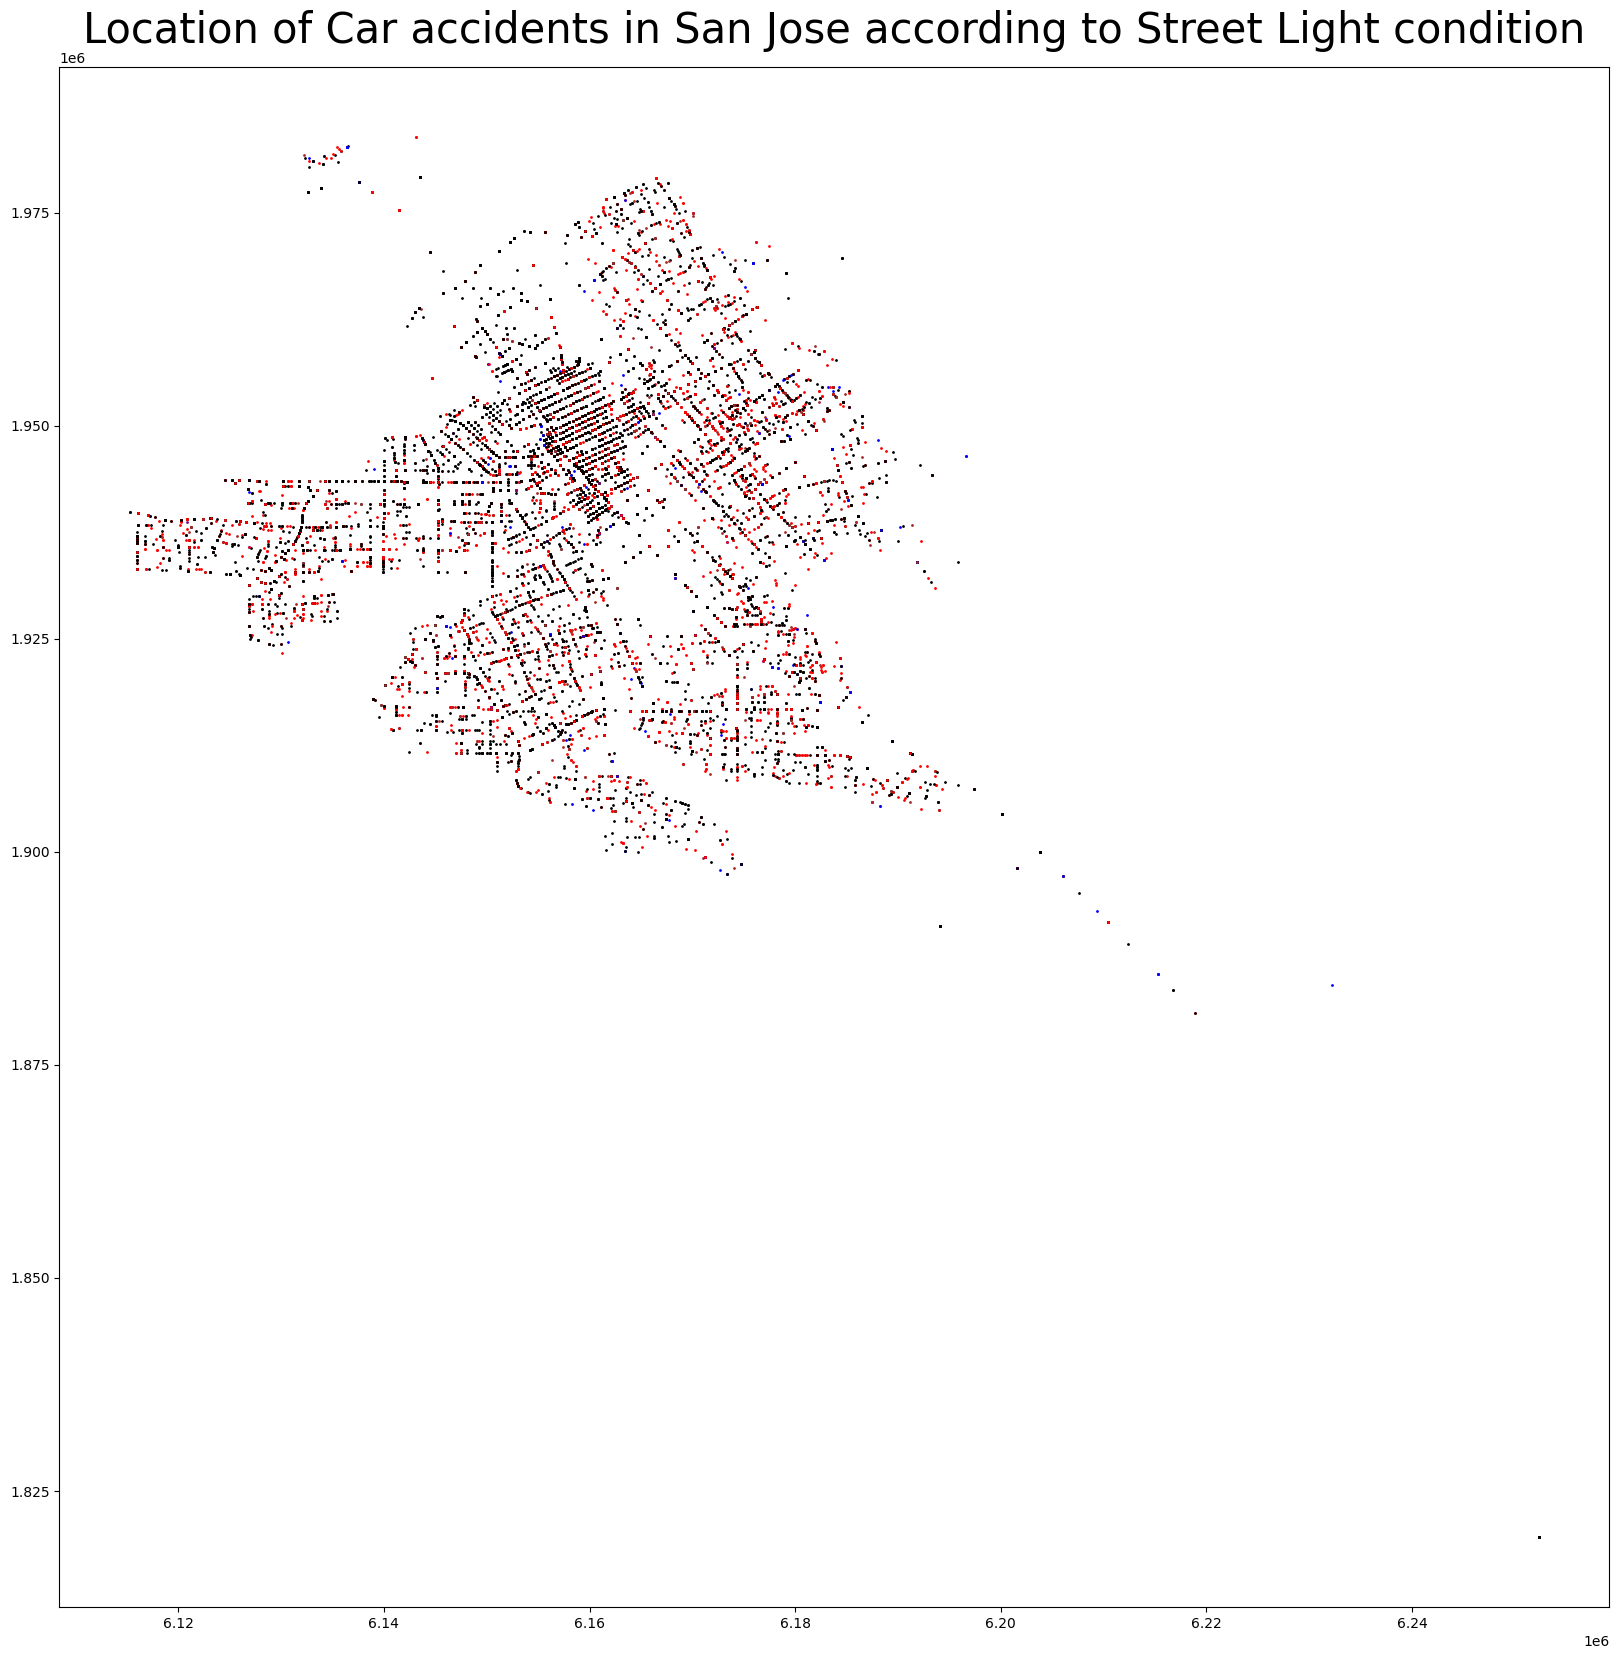

In [10]:
import matplotlib.lines as mlines

plt.subplots(figsize=(20,20))
plt.title("Location of Car accidents in San Jose according to Street Light condition", fontsize=30)
for i in tqdm(range(len(result2))):
    if LIGHTING[i].strip() == 'Daylight':
        plt.scatter(X[i],Y[i],s=1,c='black')
        black_line = mlines.Line2D([], [], color='black', markersize=15, label='Daylight')
        
    elif LIGHTING[i].strip() == 'Dark - Street Light':
        plt.scatter(X[i],Y[i],s=1,c='red')
        red_line = mlines.Line2D([], [], color='red', markersize=15, label='Dark - Street Light')
        
    elif LIGHTING[i].strip() == 'Dark - No Street Light':
        plt.scatter(X[i],Y[i],s=1,c='blue')
        blue_line = mlines.Line2D([], [], color='blue', markersize=15, label='Dark - No Street Light')
        
    elif LIGHTING[i].strip() == 'Dark - Street Light Not Functioning':
        plt.scatter(X[i],Y[i],s=1,c='purple')
        purple_line = mlines.Line2D([], [], color='purple', markersize=15, label='Dark - Street Light Not Functioning')
        
    elif LIGHTING[i].strip() == 'Dusk - Dawn':
        plt.scatter(X[i],Y[i],s=1,c='brown')
        brown_line = mlines.Line2D([], [], color='brown', markersize=15, label='Dusk - Dawn')
    
plt.xlabel("Latitude", fontsize=30)
plt.ylabel("Longitude", fontsize=30)
plt.legend(handles=[black_line, red_line, blue_line, purple_line, brown_line], title="Lighting on Roadway", title_fontsize=30, fontsize="20", loc="upper right")
plt.show()

In [3]:
result2['ROADWAYSURFACE'].unique()

array(['Dry', 'Unknown', 'Wet', 'Snowy - Icy',
       'Slippery (Muddy, Oily, etc.)', 'Slippery (Muddy Oily etc.)'],
      dtype=object)

In [ ]:
a, b, c, d = 0, 0, 0, 0
for i in tqdm(range(len(result2))):
    if result2.loc[i, 'ROADWAYSURFACE'].strip() == 'Dry':
        #plt.scatter(result2['X'][i],result2['Y'][i],s=1,c='black')
        black_line = mlines.Line2D([], [], color='black', markersize=15, label='Dry')
        
    elif result2.loc[i, 'ROADWAYSURFACE'].strip() == 'Wet':
        #plt.scatter(result2['X'][i],result2['Y'][i],s=1,c='red')
        red_line = mlines.Line2D([], [], color='red', markersize=15, label='Wet')
        
    elif result2.loc[i, 'ROADWAYSURFACE'].strip() == 'Slippery (Muddy Oily etc.)':
        #plt.scatter(result2['X'][i],result2['Y'][i],s=1,c='blue')
        blue_line = mlines.Line2D([], [], color='blue', markersize=15, label='Slippery (Muddy Oily etc.)')
        
    elif result2.loc[i, 'ROADWAYSURFACE'].strip() == 'Snowy - Icy':
        #plt.scatter(result2['X'][i],result2['Y'][i],s=1,c='yellow')
        yellow_line = mlines.Line2D([], [], color='yellow', markersize=15, label='Snowy - Icy')

100%|██████████| 54910/54910 [1:05:52<00:00, 13.89it/s]


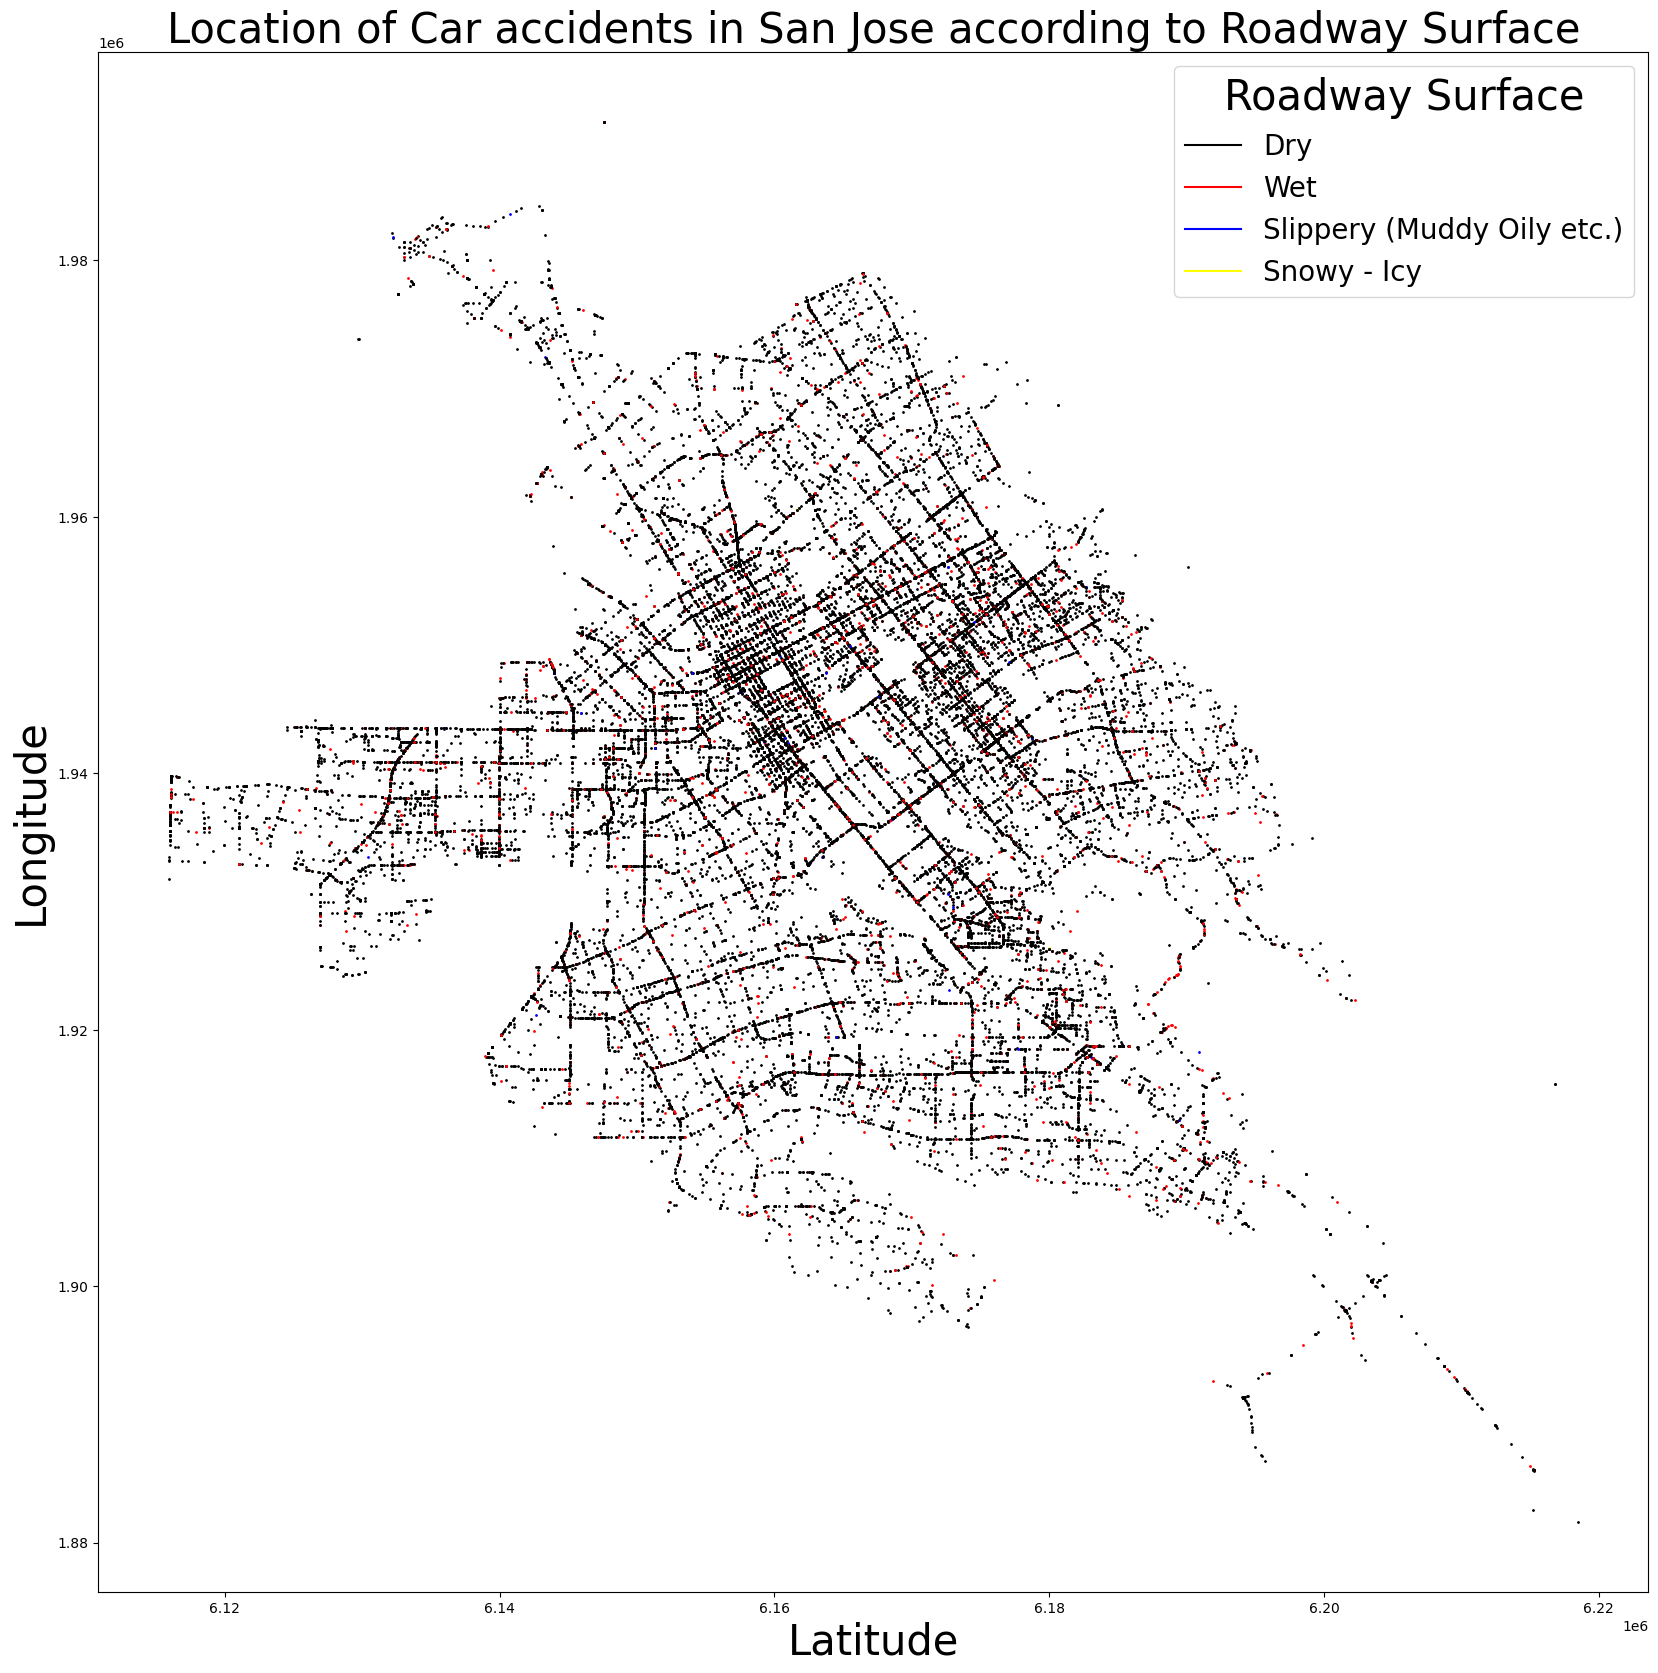

In [5]:
import matplotlib.lines as mlines

plt.subplots(figsize=(20,20))
plt.title("Location of Car accidents in San Jose according to Roadway Surface", fontsize=30)
for i in tqdm(range(len(result2))):
    if result2.loc[i, 'ROADWAYSURFACE'].strip() == 'Dry':
        plt.scatter(result2['X'][i],result2['Y'][i],s=1,c='black')
        black_line = mlines.Line2D([], [], color='black', markersize=15, label='Dry')
        
    elif result2.loc[i, 'ROADWAYSURFACE'].strip() == 'Wet':
        plt.scatter(result2['X'][i],result2['Y'][i],s=1,c='red')
        red_line = mlines.Line2D([], [], color='red', markersize=15, label='Wet')
        
    elif result2.loc[i, 'ROADWAYSURFACE'].strip() == 'Slippery (Muddy Oily etc.)':
        plt.scatter(result2['X'][i],result2['Y'][i],s=1,c='blue')
        blue_line = mlines.Line2D([], [], color='blue', markersize=15, label='Slippery (Muddy Oily etc.)')
        
    elif result2.loc[i, 'ROADWAYSURFACE'].strip() == 'Snowy - Icy':
        plt.scatter(result2['X'][i],result2['Y'][i],s=1,c='yellow')
        yellow_line = mlines.Line2D([], [], color='yellow', markersize=15, label='Snowy - Icy')
    
plt.xlabel("Latitude", fontsize=30)
plt.ylabel("Longitude", fontsize=30)
plt.legend(handles=[black_line, red_line, blue_line, yellow_line], title="Roadway Surface", title_fontsize=30, fontsize="20", loc="upper right")
plt.show()

## Most of the car accidents occurred on dry road surface (black dots), because the weather in San Jose is mostly sunny and the surface of the road is dry most of the days accordingly.
## And, it often rains in winter, so the car accidents occurred on wet road surface occasionally but not as often as dry surface (red dots). 
## Since it rarely snows in San Jose, the records of car accidents on snow - icy surface cannot be easily found.